In [56]:
import pandas as pd


In [57]:
! ls 3

3章_顧客の全体像を把握する１０本ノック.ipynb         class_master.csv
3章_顧客の全体像を把握する１０本ノック_answer.ipynb  customer_master.csv
campaign_master.csv                                  use_log.csv


In [58]:
use_log = pd.read_csv('3/use_log.csv')
print(use_log.head())
print(use_log.describe())

            log_id customer_id     usedate
0  L00000049012330    AS009373  2018-04-01
1  L00000049012331    AS015315  2018-04-01
2  L00000049012332    AS040841  2018-04-01
3  L00000049012333    AS046594  2018-04-01
4  L00000049012334    AS073285  2018-04-01
                 log_id customer_id     usedate
count            197428      197428      197428
unique           197428        4192         365
top     L00000049012330    GD960674  2019-02-18
freq                  1         105         619


In [59]:
customer = pd.read_csv('3/customer_master.csv')
print(customer.head())
print(customer.describe())

  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted  
0           0  
1           0  
2           0  
3           0  
4           0  
        is_deleted
count  4192.000000
mean      0.322042
std       0.467315
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


In [60]:
campaign_master = pd.read_csv('3/campaign_master.csv')
print(campaign_master.head())
print(campaign_master.describe())

  campaign_id campaign_name
0         CA1            通常
1         CA2         入会費半額
2         CA3         入会費無料
       campaign_id campaign_name
count            3             3
unique           3             3
top            CA1            通常
freq             1             1


In [61]:
class_master = pd.read_csv('3/class_master.csv')
print(class_master.head())
print(class_master.describe())

  class class_name  price
0   C01     オールタイム  10500
1   C02      デイタイム   7500
2   C03        ナイト   6000
              price
count      3.000000
mean    8000.000000
std     2291.287847
min     6000.000000
25%     6750.000000
50%     7500.000000
75%     9000.000000
max    10500.000000


In [62]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
print(customer_join.head())

print(customer_join.isnull().sum())

  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted class_name  price campaign_name  
0           0     オールタイム  10500            通常  
1           0     オールタイム  10500            通常  
2           0     オールタイム  10500            通常  
3           0     オールタイム  10500            通常  
4           0        ナイト   6000            通常  
customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name    

In [63]:
for col in ['class_name', 'campaign_name', 'gender', 'is_deleted']:
  print(f'Group by {col}')
  agg = customer_join.groupby(col).count()['customer_id']
  print(agg)

Group by class_name
class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64
Group by campaign_name
campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64
Group by gender
gender
F    1983
M    2209
Name: customer_id, dtype: int64
Group by is_deleted
is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64


In [64]:
# 入会人数

customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime('20180401')]
print(len(customer_start))

1361


In [65]:
# 2019/3に在籍していたユーザー
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [66]:
for col in ['class_name', 'campaign_name', 'gender', 'is_deleted']:
  print(f'Group by {col}')
  agg = customer_newer.groupby(col).count()['customer_id']
  print(agg)

Group by class_name
class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64
Group by campaign_name
campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64
Group by gender
gender
F    1400
M    1553
Name: customer_id, dtype: int64
Group by is_deleted
is_deleted
0    2842
1     111
Name: customer_id, dtype: int64


In [67]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['ym'] = use_log['usedate'].dt.strftime('%Y%m')
use_months = use_log.groupby(['ym','customer_id'], as_index=False).count()
use_months.rename(columns={'log_id': 'count'}, inplace=True)
del use_months['usedate']

uselog_customer = use_months.groupby('customer_id').agg(['mean', 'median', 'min', 'max'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,min,max
0,AS002855,4.500000,5.0,2,7
1,AS008805,4.000000,4.0,1,8
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,3,7
4,AS015233,7.545455,7.0,4,11


In [68]:
use_log['weekday'] = use_log['usedate'].dt.weekday
uselog_weekday = use_log.groupby(['customer_id', 'weekday'], as_index=False).count()[['customer_id', 'ym', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id': 'count'}, inplace=True)

# ユーザーごとの最も利用回数が多い月での利用回数
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]

uselog_weekday['routine_flg'] = 0
# Replace values where the condition is False.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,33,1
1,AS008805,20,1
2,AS009013,2,0
3,AS009373,44,1
4,AS015233,24,1


In [69]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,1


In [73]:
# 会員期間
customer_join['calc_date'] = customer_join['end_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = customer_join['calc_date'] - customer_join['start_date']
# 列のmeanは顧客毎の月内平均利用回数
# 集計値のmeanは平均利用回数の平均
# 平均して「平均５回程度」使っている
customer_join[['mean', 'median', 'min', 'max']].describe()

,mean,median,min,max
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,3.041269,7.823950
std,1.777533,1.874874,1.951565,2.168959
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,2.000000,7.000000
50%,5.000000,5.000000,3.000000,8.000000
75%,6.416667,6.500000,4.000000,9.000000
max,12.000000,12.000000,12.000000,14.000000


In [75]:
# 定期利用している会員が多い
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     368
1    3824
Name: customer_id, dtype: int64

(array([857., 694., 475., 368., 311., 331., 323., 237., 288., 308.]),
 array([  44. ,  185.6,  327.2,  468.8,  610.4,  752. ,  893.6, 1035.2,
        1176.8, 1318.4, 1460. ]),
 <BarContainer object of 10 artists>)

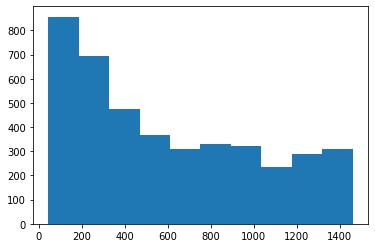

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'].dt.days)

In [80]:
# 退会ユーザーと継続ユーザーの違い
customer_charn = customer_join.loc[customer_join['is_deleted']==1]
print('charn user')
print(customer_charn.describe())


charn user
       is_deleted         price         mean       median          min  \
count      1350.0   1350.000000  1350.000000  1350.000000  1350.000000   
mean          1.0   8595.555556     3.865474     3.621852     1.821481   
std           0.0   1949.163652     1.246385     1.270847     0.976361   
min           1.0   6000.000000     1.000000     1.000000     1.000000   
25%           1.0   6000.000000     3.000000     3.000000     1.000000   
50%           1.0   7500.000000     4.000000     4.000000     2.000000   
75%           1.0  10500.000000     4.666667     4.500000     2.000000   
max           1.0  10500.000000     9.000000     9.000000     8.000000   

               max  routine_flg            membership_period  
count  1350.000000  1350.000000                         1350  
mean      6.461481     0.755556            270 days 05:38:08  
std       2.584021     0.429917  155 days 02:18:43.903705816  
min       1.000000     0.000000             44 days 00:00:00  
25%    

In [82]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0]
print('stay user')
print(customer_stay.describe())


stay user
       is_deleted         price         mean       median          min  \
count      2842.0   2842.000000  2842.000000  2842.000000  2842.000000   
mean          0.0   8542.927516     6.030288     6.024279     3.620690   
std           0.0   1977.189779     1.553587     1.599765     2.030488   
min           0.0   6000.000000     3.166667     3.000000     1.000000   
25%           0.0   6000.000000     4.833333     5.000000     2.000000   
50%           0.0   7500.000000     5.583333     5.500000     3.000000   
75%           0.0  10500.000000     7.178030     7.000000     5.000000   
max           0.0  10500.000000    12.000000    12.000000    12.000000   

               max  routine_flg            membership_period  
count  2842.000000  2842.000000                         2842  
mean      8.471147     0.986629  756 days 01:17:31.372273048  
std       1.571048     0.114877  420 days 20:45:11.520227816  
min       5.000000     0.000000             46 days 00:00:00  
25%     

In [ ]:
customer_join.to_csv('3/customer_join.csv', index=False)